In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 1. Outputs Overview

In [2]:
# Read the csv file
output = pd.read_csv('../output_analysis.csv', header=None)

# Set names and constants
output.columns = ["Blocked Calls Rate (%)", "Dropped Calls Rate (%)"]
total_runs = 100

In [3]:
output_no_reservation = output.loc[:total_runs - 1].reset_index(drop=True)
output_no_reservation

,Blocked Calls Rate (%),Dropped Calls Rate (%)
0,0.3525,0.5820
1,0.3580,0.6000
2,0.3615,0.5575
3,0.3380,0.5885
4,0.3390,0.5685
...,...,...
95,0.3495,0.5980
96,0.3360,0.5540
97,0.3550,0.5985
98,0.3300,0.5270


In [4]:
output_handover_reservation = output.loc[total_runs:].reset_index(drop=True)
output_handover_reservation

,Blocked Calls Rate (%),Dropped Calls Rate (%)
0,1.1280,0.3610
1,1.0960,0.3480
2,1.1120,0.3310
3,1.1030,0.3330
4,1.0895,0.3765
...,...,...
95,1.1655,0.3570
96,1.1020,0.3340
97,1.1330,0.3495
98,1.1395,0.3685


### 2. Calculate average values and indicate statistical significance

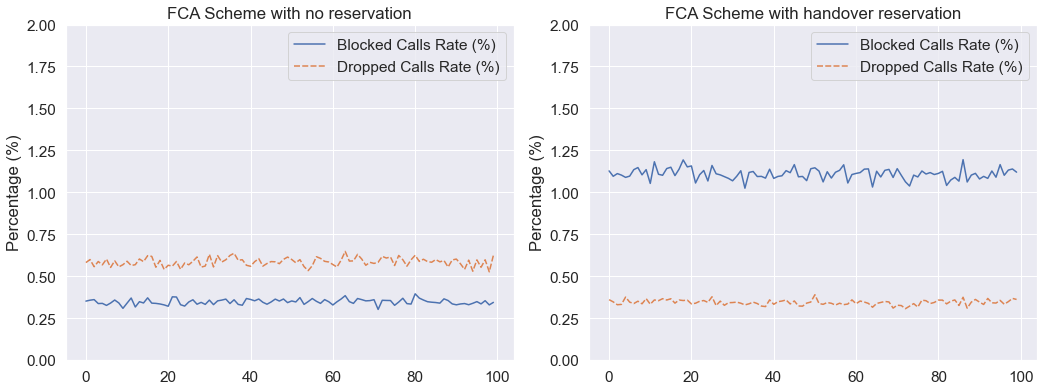

In [5]:
# Set the display
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 6)}, font_scale=1.4)

# Set 2 subplots
fig, axs = plt.subplots(ncols=2)
fig.tight_layout(pad=2.0)

# Plot the simulation outputs for both 2 FCA schemes
sns.lineplot(data=output_no_reservation, ax=axs[0]) \
    .set(ylabel="Percentage (%)", ylim=(0, 2), title="FCA Scheme with no reservation")
sns.lineplot(data=output_handover_reservation, ax=axs[1]) \
    .set(ylabel="Percentage (%)", ylim=(0, 2), title="FCA Scheme with handover reservation")

plt.show()

In [6]:
blocked_rate_no_reservation = output_no_reservation['Blocked Calls Rate (%)']
dropped_rate_no_reservation = output_no_reservation['Dropped Calls Rate (%)']

# Calculate the mean and standard deviation
print("FCA SCHEME WITH NO RESERVATION")

print("-----Blocked Calls Rate (%)-----")
print("Mean: {:f}".format(blocked_rate_no_reservation.mean()))
print("Standard Deviation: {:f}".format(blocked_rate_no_reservation.std(ddof=1)))

print("-----Dropped Calls Rate (%)-----")
print("Mean: {:f}".format(dropped_rate_no_reservation.mean()))
print("Standard Deviation: {:f}".format(dropped_rate_no_reservation.std(ddof=1)))

FCA SCHEME WITH NO RESERVATION
-----Blocked Calls Rate (%)-----
Mean: 0.348290
Standard Deviation: 0.016091
-----Dropped Calls Rate (%)-----
Mean: 0.586170
Standard Deviation: 0.025201


In [7]:
blocked_rate_handover_reservation = output_handover_reservation['Blocked Calls Rate (%)']
dropped_rate_handover_reservation = output_handover_reservation['Dropped Calls Rate (%)']

# Calculate the mean and standard deviation
print("FCA SCHEME WITH HANDOVER RESERVATION")

print("-----Blocked Calls Rate (%)-----")
print("Mean: {:f}".format(blocked_rate_handover_reservation.mean()))
print("Standard Deviation: {:f}".format(blocked_rate_handover_reservation.std(ddof=1)))

print("-----Dropped Calls Rate (%)-----")
print("Mean: {:f}".format(dropped_rate_handover_reservation.mean()))
print("Standard Deviation: {:f}".format(dropped_rate_handover_reservation.std(ddof=1)))

FCA SCHEME WITH HANDOVER RESERVATION
-----Blocked Calls Rate (%)-----
Mean: 1.109680
Standard Deviation: 0.033420
-----Dropped Calls Rate (%)-----
Mean: 0.344505
Standard Deviation: 0.015616


### 3. Output Analysis

In [8]:
t = 1.66
n = 100

print("FCA SCHEME WITH NO RESERVATION")

print("-----Blocked Calls Rate (%)-----")
# Calculate the mean and standard deviation
mean1 = blocked_rate_no_reservation.mean()
std1 = blocked_rate_no_reservation.std(ddof=1)
delta1 = t*std1/(math.sqrt(n))
# Get the confidence interval
print("Delta: {:f}".format(delta1))
print("90% confidence interval: [{:f}, {:f}]" \
      .format(mean1 - delta1, mean1 + delta1))

print("-----Dropped Calls Rate (%)-----")
# Calculate the mean and standard deviation
mean2 = dropped_rate_no_reservation.mean()
std2 = dropped_rate_no_reservation.std(ddof=1)
delta2 = t*std2/(math.sqrt(n))
# Get the confidence interval
print("Delta: {:f}".format(delta2))
print("90% confidence interval: [{:f}, {:f}]" \
      .format(mean2 - delta2, mean2 + delta2))

FCA SCHEME WITH NO RESERVATION
-----Blocked Calls Rate (%)-----
Delta: 0.002671
90% confidence interval: [0.345619, 0.350961]
-----Dropped Calls Rate (%)-----
Delta: 0.004183
90% confidence interval: [0.581987, 0.590353]


In [9]:
t = 1.66
n = 100

print("FCA SCHEME WITH HANDOVER RESERVATION")

print("-----Blocked Calls Rate (%)-----")
# Calculate the mean and standard deviation
mean3 = blocked_rate_handover_reservation.mean()
std3 = blocked_rate_handover_reservation.std(ddof=1)
delta3 = t*std3/(math.sqrt(n))
# Get the confidence interval
print("Delta: {:f}".format(delta3))
print("90% confidence interval: [{:f}, {:f}]" \
      .format(mean3 - delta3, mean3 + delta3))

print("-----Dropped Calls Rate (%)-----")
# Calculate the mean and standard deviation
mean4 = dropped_rate_handover_reservation.mean()
std4 = dropped_rate_handover_reservation.std(ddof=1)
delta4 = t*std4/(math.sqrt(n))
# Get the confidence interval
print("Delta: {:f}".format(delta4))
print("90% confidence interval: [{:f}, {:f}]" \
      .format(mean4 -delta4, mean4 + delta4))

FCA SCHEME WITH HANDOVER RESERVATION
-----Blocked Calls Rate (%)-----
Delta: 0.005548
90% confidence interval: [1.104132, 1.115228]
-----Dropped Calls Rate (%)-----
Delta: 0.002592
90% confidence interval: [0.341913, 0.347097]


### 4. Comparisions between 2 FCA schemes

#### Blocked Calls rate

In [10]:
# Subtract the Blocked Calls rate between 2 schemes
Z_r_blocked_rate = blocked_rate_no_reservation - blocked_rate_handover_reservation
Z_r_blocked_rate.head()

0   -0.7755
1   -0.7380
2   -0.7505
3   -0.7650
4   -0.7505
Name: Blocked Calls Rate (%), dtype: float64

In [11]:
# Calculate the mean and standard deviation
mean5 = Z_r_blocked_rate.mean()
std5 = Z_r_blocked_rate.std(ddof=1)
# Get the confidence interval
t = 1.66
n = 100
delta5 = t*std5/(math.sqrt(n))

print("-----DIFFRENCE BETWEEN BLOCKED CALLS RATE-----")
print("Mean: {:f}".format(mean5))
print("Standard Deviation: {:f}".format(std5))
print("Delta: {:f}".format(delta5))
print("90% confidence interval: [{:f}, {:f}]" \
      .format(mean5 -delta5, mean5 + delta5))

-----DIFFRENCE BETWEEN BLOCKED CALLS RATE-----
Mean: -0.761390
Standard Deviation: 0.038441
Delta: 0.006381
90% confidence interval: [-0.767771, -0.755009]


#### Dropped Calls rate

In [12]:
# Subtract the Dropped Calls rate between 2 schemes
Z_r_dropped_rate = dropped_rate_no_reservation - dropped_rate_handover_reservation
Z_r_dropped_rate.head()

0    0.2210
1    0.2520
2    0.2265
3    0.2555
4    0.1920
Name: Dropped Calls Rate (%), dtype: float64

In [13]:
# Calculate the mean and standard deviation
mean6 = Z_r_dropped_rate.mean()
std6 = Z_r_dropped_rate.std(ddof=1)
# Get the confidence interval
t = 1.66
n = 100
delta6 = t*std6/(math.sqrt(n))

print("-----DIFFRENCE BETWEEN DROPPED CALLS RATE-----")
print("Mean: {:f}".format(mean6))
print("Standard Deviation: {:f}".format(std6))
print("Delta: {:f}".format(delta6))
print("90% confidence interval: [{:f}, {:f}]" \
      .format(mean6 -delta6, mean6 + delta6))

-----DIFFRENCE BETWEEN DROPPED CALLS RATE-----
Mean: 0.241665
Standard Deviation: 0.030489
Delta: 0.005061
90% confidence interval: [0.236604, 0.246726]
